# Streaming Platform Analysis 
### O intuito desse projeto é entender como estão distribuidos os filmes na plataforma netflix.
### Quais os principais generos? Quais os principais diretores?
### Além disso, entender se existe uma possível correlação entre esses fatores e o score no IMDb

# Importando Bibliotecas e Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


### Essas são as colunas presentes no dataset

### Title: The Title of the Movie
### Year: The Year in which the Movie was released
### Age: Age Required for watching the movie
### IMDb: The IMDb Score of the Movie (out of 10)
### Rotten Tomatoes: The Rotten Tomatoes Score of the Movie (out of 100)
### Netflix: Whether the movie is present on Netflix or not (1 for True, 0 for False)
### Hulu: Whether the movie is present on Hulu or not (1 for True, 0 for False)
### Prime Video: Whether the movie is present on Prime Video or not (1 for True, 0 for False)
### Disney+: Whether the movie is present on Disney+ or not (1 for True, 0 for False)
### Directors: Director(s) of the Movie
### Genres: Genres of the Movies
### Country: Countries in which the movie was directed
### Language: Language(s) in which the movie is available

## Análise Básica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              5338 non-null   object 
 5   IMDb             9309 non-null   object 
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Type             9515 non-null   int64  
 12  Directors        9104 non-null   object 
 13  Genres           9399 non-null   object 
 14  Country          9261 non-null   object 
 15  Language         9202 non-null   object 
 16  Runtime          9196 non-null   float64
dtypes: float64(1),

###  Como podemos ver, o Dataset apresenta alguns valores nulos, vamos lidar com eles agora

In [4]:
for cols in df.columns: 
    null_values = np.mean(df[cols].isnull())*100
    print("{} - {}%".format(cols,null_values))

Unnamed: 0 - 0.0%
ID - 0.0%
Title - 0.0%
Year - 0.0%
Age - 43.89910667367315%
IMDb - 2.1650026274303733%
Rotten Tomatoes - 0.07356805044666316%
Netflix - 0.0%
Hulu - 0.0%
Prime Video - 0.0%
Disney+ - 0.0%
Type - 0.0%
Directors - 4.319495533368365%
Genres - 1.2191276931161323%
Country - 2.6694692590646345%
Language - 3.2895428271150813%
Runtime - 3.352601156069364%


## Limpando o Dataset

### A idade indicativa do filme ("Age") tem 43% de valores nulos, vamos simplesmente dropar essa coluna

In [5]:
df_drop_age = df.copy()
df_drop_age.drop(columns=["Unnamed: 0", "Age"], inplace=True)
df_drop_age.dropna(axis=0, inplace = True)
df_drop_age.head()


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
5,6,To All the Boys I've Loved Before,2018,7.1/10,94/100,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


### Outro ponto que podemos observar é que as notas do IMDb e do Rotten Tomatoes estão como "Object".
### Vamos transformar-los em valores númericos para facilitar a análise

In [6]:
df_scores = df_drop_age.copy()

df_scores["IMDb"] = df_scores["IMDb"].apply(lambda x:x.split("/")[0])
df_scores["Rotten Tomatoes"] = df_scores["Rotten Tomatoes"].apply(lambda x:x.split("/")[0])
df_scores["IMDb"] = df_scores["IMDb"].astype("float64")
df_scores["Rotten Tomatoes"] = df_scores["Rotten Tomatoes"].astype("int64")

In [7]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8695 entries, 0 to 9496
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8695 non-null   int64  
 1   Title            8695 non-null   object 
 2   Year             8695 non-null   int64  
 3   IMDb             8695 non-null   float64
 4   Rotten Tomatoes  8695 non-null   int64  
 5   Netflix          8695 non-null   int64  
 6   Hulu             8695 non-null   int64  
 7   Prime Video      8695 non-null   int64  
 8   Disney+          8695 non-null   int64  
 9   Type             8695 non-null   int64  
 10  Directors        8695 non-null   object 
 11  Genres           8695 non-null   object 
 12  Country          8695 non-null   object 
 13  Language         8695 non-null   object 
 14  Runtime          8695 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 1.1+ MB


### O Data set apresenta alguns problemas, por exemplo, quando olhamos a coluna de "Genero" (Genre), percebemos que existe mais de uma classificação, separada por vírgula. Por exemplo, um filme pode ser de comédia e ação. Isso também acontece para a coluna de país. Se olharmos bem, faz sentido considerarmos o primeiro gênero da lista de valores como o gênero "principal", assim como o país.  Com isso em mente, e para facilitar a análise, vamos fazer com que o primeiro gênero e o primeiro país sejam os valores que aparecem em cada coluna

In [8]:
genres = []

for i in df_scores["Genres"]:
    main_genre = i.split(",")[0]
    genres.append(main_genre)

genres[:10]

['Biography',
 'Action',
 'Documentary',
 'Drama',
 'Comedy',
 'Documentary',
 'Action',
 'Comedy',
 'Drama',
 'Crime']

In [9]:
df_genre = df_scores.copy()
df_genre["Genre"] = genres 
df_genre.drop(columns="Genres", inplace = True)
df_genre.head()


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Country,Language,Runtime,Genre
0,1,The Irishman,2019,7.8,98,1,0,0,0,0,Martin Scorsese,United States,"English,Italian,Latin,Spanish,German",209.0,Biography
1,2,Dangal,2016,8.4,97,1,0,0,0,0,Nitesh Tiwari,"India,United States,United Kingdom,Australia,K...","Hindi,English",161.0,Action
2,3,David Attenborough: A Life on Our Planet,2020,9.0,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",United Kingdom,English,83.0,Documentary
3,4,Lagaan: Once Upon a Time in India,2001,8.1,94,1,0,0,0,0,Ashutosh Gowariker,"India,United Kingdom","Hindi,English",224.0,Drama
5,6,To All the Boys I've Loved Before,2018,7.1,94,1,0,0,0,0,Susan Johnson,United States,English,99.0,Comedy


In [10]:
country = []

for i in df_genre["Country"]:
    main_country = i.split(",")[0]
    country.append(main_country)

country[:10]

['United States',
 'India',
 'United Kingdom',
 'India',
 'United States',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'India']

In [11]:
df_country = df_genre.copy()
df_country["Countrys"] = country
df_country.drop(columns=["Language","Country"], inplace = True)
df_country.head()

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Runtime,Genre,Countrys
0,1,The Irishman,2019,7.8,98,1,0,0,0,0,Martin Scorsese,209.0,Biography,United States
1,2,Dangal,2016,8.4,97,1,0,0,0,0,Nitesh Tiwari,161.0,Action,India
2,3,David Attenborough: A Life on Our Planet,2020,9.0,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",83.0,Documentary,United Kingdom
3,4,Lagaan: Once Upon a Time in India,2001,8.1,94,1,0,0,0,0,Ashutosh Gowariker,224.0,Drama,India
5,6,To All the Boys I've Loved Before,2018,7.1,94,1,0,0,0,0,Susan Johnson,99.0,Comedy,United States


# Visualizações

<AxesSubplot:xlabel='Year', ylabel='Count'>

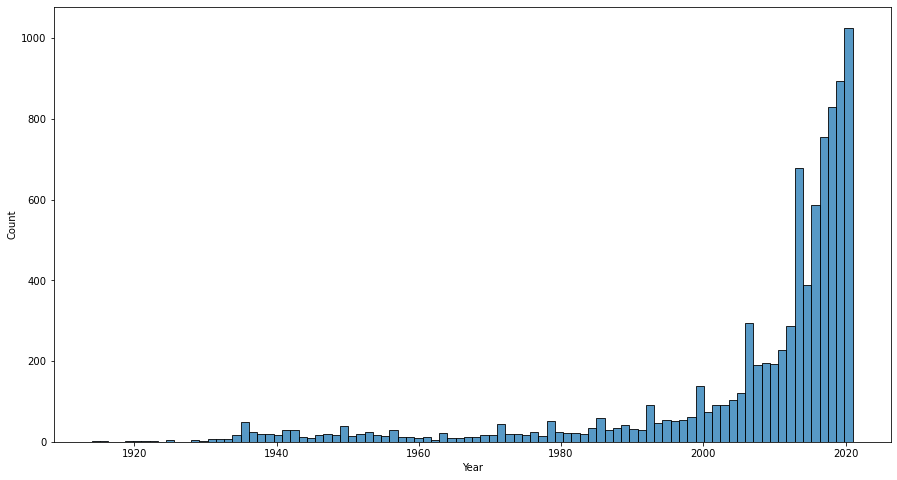

In [12]:

plt.figure(figsize=(15,8))
sns.histplot(x="Year", data = df_country)

### Como fica claro nesse histograma, grande parte dos filmes presentes nas plataformas de streaming foram lançados a partir de, aproximadamente, 2012

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Count'>

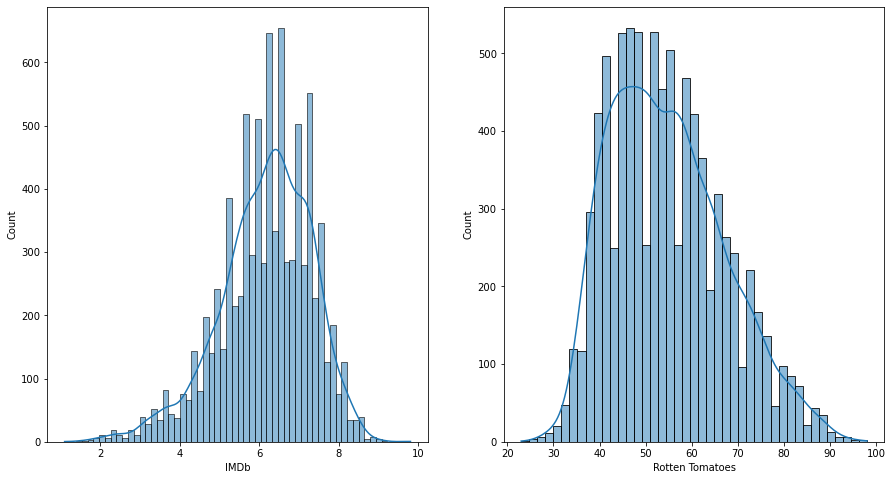

In [60]:
fig, axs = plt.subplots(ncols=2, figsize=(15,8))
sns.histplot(x= "IMDb", data = df_country, kde=True, ax=axs[0], )
sns.histplot(x= "Rotten Tomatoes", data = df_country, kde=True, ax=axs[1],)


### Observando esses dois histogramas vemos que as notas de cada site para os filmes mudam um pouco. No IMDb as notas parecem estar mais concentradas em 6, já no Rotten Tomatoes, as notas parecem mais concentradas entre 40 e 50

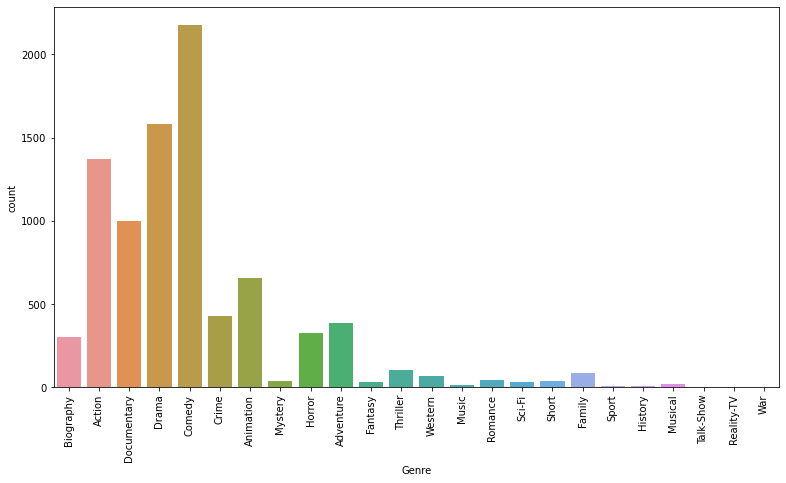

In [69]:
plt.figure(figsize=(13,7))
sns.countplot(x="Genre", data=df_country)
plt.xticks(rotation=90)
plt.show()

### Esse Gráfico de barras demonstra que grande parte dos filmes disponíveis nas plataformas são do gênero Comédia, Drama e ação

### Vamos analisar qual plataforma possui a maior quantidade de filmes

In [24]:
streams = ['Netflix', 'Hulu','Prime Video', 'Disney+']

count = []
for i in df_country.columns: 
    if i in streams:
        soma = df_country[i].sum()
        count.append(soma)
count



[3325, 998, 3799, 819]

Text(0.5, 1.0, 'Total Movies by stream')

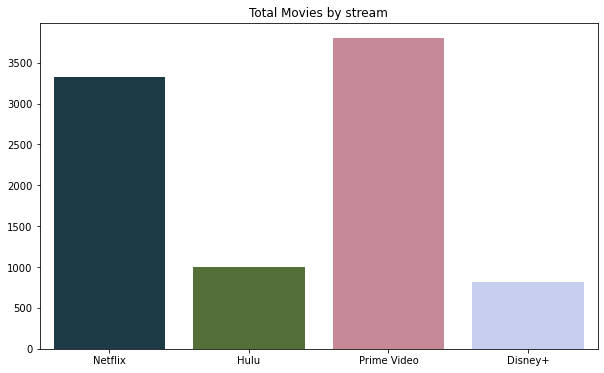

In [33]:

plt.figure(figsize=(10,6))
sns. barplot(x=streams, y= count,palette="cubehelix")
plt.title("Total Movies by stream")

### Uma análise interessantes é qual a média das notas que um diretor possui para suas produções? Vamos olhar isso 

In [86]:
df_country[["IMDb","Directors"]].groupby(by="Directors").agg(["mean","count"]).sort_values(by=("IMDb","mean"), ascending=False)

IMDb      
                          mean count
Directors                           
Jason Docter,Matt Docter  9.80     1
PJ Moynihan               9.20     1
Amadeusz Kocan            9.15     2
Samir Al Asfory           9.00     1
Dennis M. Lynch           9.00     1
...                        ...   ...
Sajid Khan                1.70     1
David Rambaldi            1.60     1
Sasha Burrow              1.50     1
S.A. Zaidi                1.50     1
Jason Wright              1.10     1

[6327 rows x 2 columns]

### Aqui temos um problema, a maioria dos diretores nas primeiras posições só possuem um filme, isso acaba modificando muito as médias, uma vez que ela so levará em conta um único filme. 
### Para termos uma ideia melhor das médias por diretor, vamor filtrar esses dados para diretores que lançaram no mínimo 5 filmes

In [91]:
directors = df_country[["IMDb","Directors"]].groupby(by="Directors").agg(["mean","count"]).sort_values(by=("IMDb","mean"), ascending=False)
directors[directors[("IMDb","count")]>4].head(10)

IMDb      
                             mean count
Directors                              
Anthony Russo,Joe Russo  7.740000     5
Brad Bird                7.720000     5
Bong Joon Ho             7.620000     5
Alfred Hitchcock         7.620000     5
Tim Gray                 7.550000     6
Martin Scorsese          7.520000    10
Mike Clattenburg         7.440000     5
James Algar              7.350000     8
Youssef Chahine          7.333333     6
Anurag Basu              7.320000     5

### Outra análise interessante é a média das notas por Gênero de filme

In [34]:
genres_imdb = df_country[["IMDb","Genre"]].groupby(by="Genre").mean().sort_values(by="IMDb", ascending=False)
genres_imdb.head(10)


,IMDb
Genre,
Talk-Show,7.700000
Reality-TV,7.000000
Documentary,6.992269
History,6.862500
Music,6.776923
Biography,6.743189
Musical,6.588889
Animation,6.460458
Sport,6.400000


Text(0.5, 0.98, 'IMDb score by Streaming Platform')

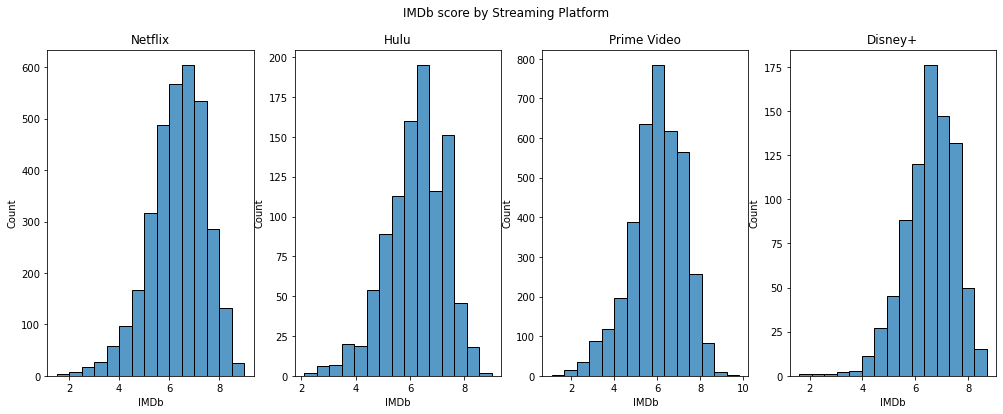

In [13]:
nf = df_country[df_country["Netflix"] == 1]
h = df_country[df_country["Hulu"] == 1]
pv = df_country[df_country["Prime Video"] == 1]
d = df_country[df_country["Disney+"] == 1]

fig, axs = plt.subplots(ncols=4, figsize=(17,6))
sns.histplot(x= "IMDb", data = nf, ax=axs[0], bins= 15)
sns.histplot(x= "IMDb", data = h, ax=axs[1], bins = 15)
sns.histplot(x= "IMDb", data = pv, ax=axs[2], bins = 15)
sns.histplot(x= "IMDb", data = d, ax=axs[3], bins = 15)

axs[0].set_title("Netflix")
axs[1].set_title("Hulu")
axs[2].set_title("Prime Video")
axs[3].set_title("Disney+")

fig.suptitle("IMDb score by Streaming Platform")


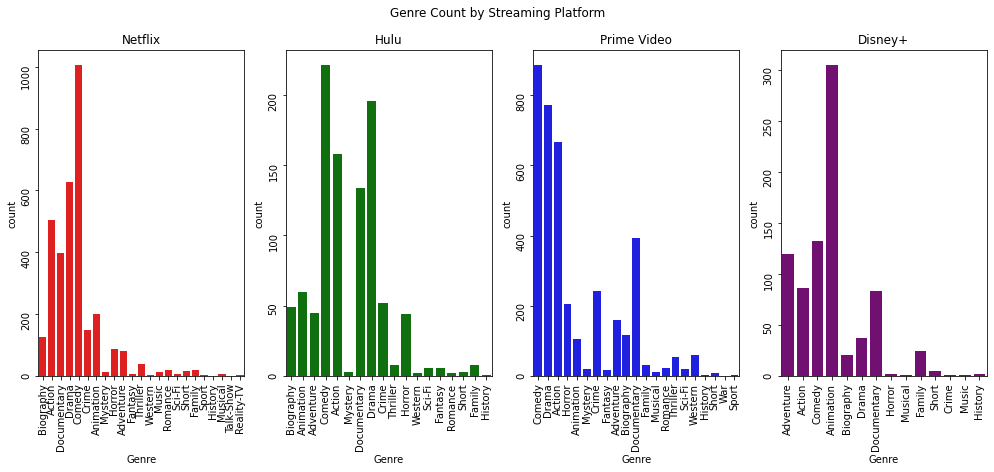

In [38]:
fig, axs = plt.subplots(ncols=4, figsize=(17,6))
sns.countplot(x= "Genre", data = nf, ax=axs[0], color = "red")
sns.countplot(x= "Genre", data = h, ax=axs[1], color = "green")
sns.countplot(x= "Genre", data = pv, ax=axs[2], color = "blue")
sns.countplot(x= "Genre", data = d, ax=axs[3], color = "purple")

axs[0].set_title("Netflix")
axs[1].set_title("Hulu")
axs[2].set_title("Prime Video")
axs[3].set_title("Disney+")

fig.suptitle("Genre Count by Streaming Platform")

axs[0].tick_params(labelrotation=90)
axs[1].tick_params(labelrotation=90)
axs[2].tick_params(labelrotation=90)
axs[3].tick_params(labelrotation=90)



## Correlações

In [104]:
df_corr = df_country.copy()

for cols in df_corr.columns:
    if df_corr[cols].dtype == "object":
        df_corr[cols] = df_corr[cols].astype("category")
        df_corr[cols] = df_corr[cols].cat.codes
df_corr.head()


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Runtime,Genre,Countrys
0,1,7143,2019,7.8,98,1,0,0,0,0,3811,209.0,3,90
1,2,1754,2016,8.4,97,1,0,0,0,0,4322,161.0,0,36
2,3,1798,2020,9.0,95,1,0,0,0,0,147,83.0,6,89
3,4,3872,2001,8.1,94,1,0,0,0,0,531,224.0,7,36
5,6,7989,2018,7.1,94,1,0,0,0,0,5683,99.0,4,90


<AxesSubplot:>

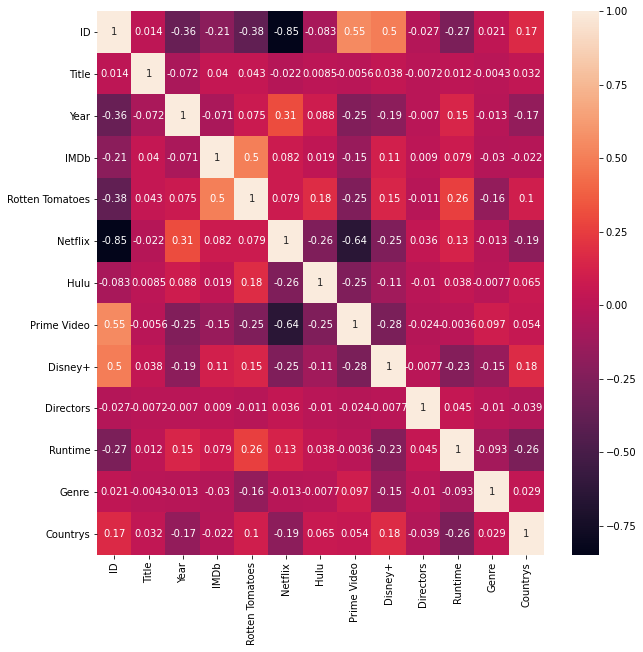

In [109]:
df_corr.drop(columns="Type", inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(df_corr.corr(), annot= True)